In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gower
import time
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Librerías importadas correctamente")
print("Semilla aleatoria fijada en 42 para reproducibilidad")
print("Configuración de visualizaciones establecida")


Librerías importadas correctamente
Semilla aleatoria fijada en 42 para reproducibilidad
Configuración de visualizaciones establecida


In [45]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]
print("Cargando dataset Adult Census...")
df = pd.read_csv('../../../datos/adult.data', names=column_names, na_values=' ?')

print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Valores faltantes: {df.isnull().sum().sum()}")

print("\nAplicando limpieza de datos...")

categorical_missing = ['workclass', 'occupation', 'native_country']
for col in categorical_missing:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"  {col}: rellenado con '{mode_value}'")

df_clean = df.copy()

df_clean['income_binary'] = (df_clean['income'] == ' >50K').astype(int)

print(f"\nDataset limpio: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")
print(f"Valores faltantes restantes: {df_clean.isnull().sum().sum()}")

print("\nPrimeras 5 filas del dataset limpio:")
df_clean.head()


Cargando dataset Adult Census...
Dataset cargado: 32561 filas, 15 columnas
Valores faltantes: 4262

Aplicando limpieza de datos...
  workclass: rellenado con ' Private'
  occupation: rellenado con ' Prof-specialty'
  native_country: rellenado con ' United-States'

Dataset limpio: 32561 filas, 16 columnas
Valores faltantes restantes: 0

Primeras 5 filas del dataset limpio:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


CREANDO VARIABLE DE AHORRO NETO
Nueva variable creada: net_capital = capital_gain - capital_loss
Valores positivos: ganancia neta
Valores negativos: pérdida neta
Valores cero: sin ganancias ni pérdidas

ESTADÍSTICAS DESCRIPTIVAS DE NET_CAPITAL:
----------------------------------------
Media: 990.35
Mediana: 0.00
Desviación estándar: 7408.99
Mínimo: -4356.00
Máximo: 99999.00

DISTRIBUCIÓN DE VALORES:
------------------------------
Valores positivos (>0): 2712 (8.3%)
Valores negativos (<0): 1519 (4.7%)
Valores cero (=0): 28330 (87.0%)


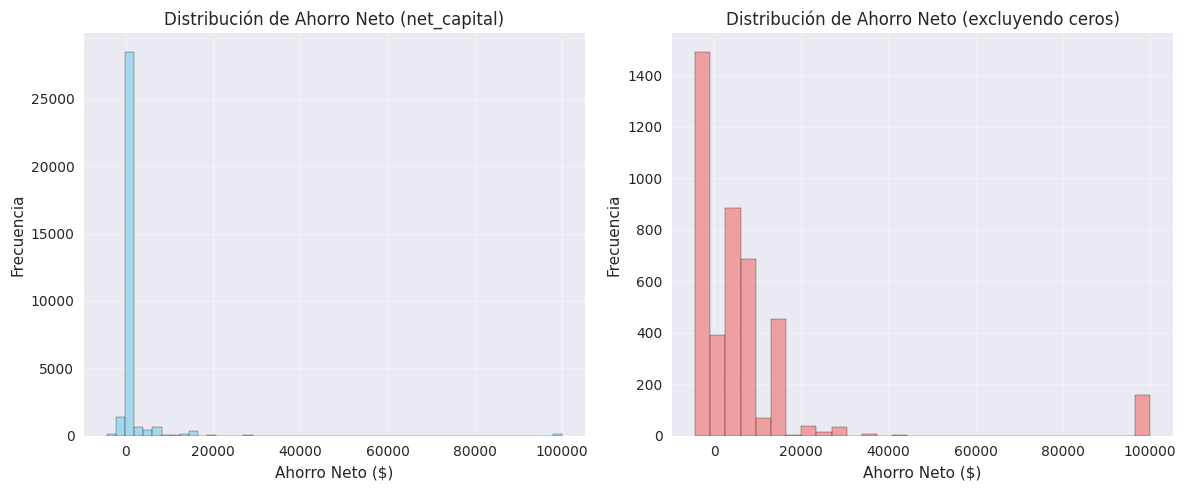

In [46]:

print("CREANDO VARIABLE DE AHORRO NETO")
print("="*50)

df_clean['net_capital'] = df_clean['capital_gain'] - df_clean['capital_loss']

print("Nueva variable creada: net_capital = capital_gain - capital_loss")
print(f"Valores positivos: ganancia neta")
print(f"Valores negativos: pérdida neta")
print(f"Valores cero: sin ganancias ni pérdidas")

print(f"\nESTADÍSTICAS DESCRIPTIVAS DE NET_CAPITAL:")
print("-" * 40)
print(f"Media: {df_clean['net_capital'].mean():.2f}")
print(f"Mediana: {df_clean['net_capital'].median():.2f}")
print(f"Desviación estándar: {df_clean['net_capital'].std():.2f}")
print(f"Mínimo: {df_clean['net_capital'].min():.2f}")
print(f"Máximo: {df_clean['net_capital'].max():.2f}")

print(f"\nDISTRIBUCIÓN DE VALORES:")
print("-" * 30)
print(f"Valores positivos (>0): {(df_clean['net_capital'] > 0).sum()} ({(df_clean['net_capital'] > 0).mean()*100:.1f}%)")
print(f"Valores negativos (<0): {(df_clean['net_capital'] < 0).sum()} ({(df_clean['net_capital'] < 0).mean()*100:.1f}%)")
print(f"Valores cero (=0): {(df_clean['net_capital'] == 0).sum()} ({(df_clean['net_capital'] == 0).mean()*100:.1f}%)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['net_capital'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Ahorro Neto (net_capital)')
plt.xlabel('Ahorro Neto ($)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
non_zero = df_clean[df_clean['net_capital'] != 0]['net_capital']
plt.hist(non_zero, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribución de Ahorro Neto (excluyendo ceros)')
plt.xlabel('Ahorro Neto ($)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

NORMALIZACIÓN DE VARIABLES NUMÉRICAS

Normalizando age:
  Rango original: [17.00, 90.00]
  Rango de valores: 73.00
  Rango normalizado: [0.0000, 1.0000]
  Ejemplo de normalización:
    39.00 → 0.3014
    50.00 → 0.4521
    38.00 → 0.2877

Normalizando education_num:
  Rango original: [1.00, 16.00]
  Rango de valores: 15.00
  Rango normalizado: [0.0000, 1.0000]
  Ejemplo de normalización:
    13.00 → 0.8000
    13.00 → 0.8000
    9.00 → 0.5333

Normalizando net_capital:
  Rango original: [-4356.00, 99999.00]
  Rango de valores: 104355.00
  Rango normalizado: [0.0000, 1.0000]
  Ejemplo de normalización:
    2174.00 → 0.0626
    0.00 → 0.0417
    0.00 → 0.0417

Normalizando hours_per_week:
  Rango original: [1.00, 99.00]
  Rango de valores: 98.00
  Rango normalizado: [0.0000, 1.0000]
  Ejemplo de normalización:
    40.00 → 0.3980
    13.00 → 0.1224
    40.00 → 0.3980

Variables numéricas normalizadas: ['age_normalized', 'education_num_normalized', 'net_capital_normalized', 'hours_per_week

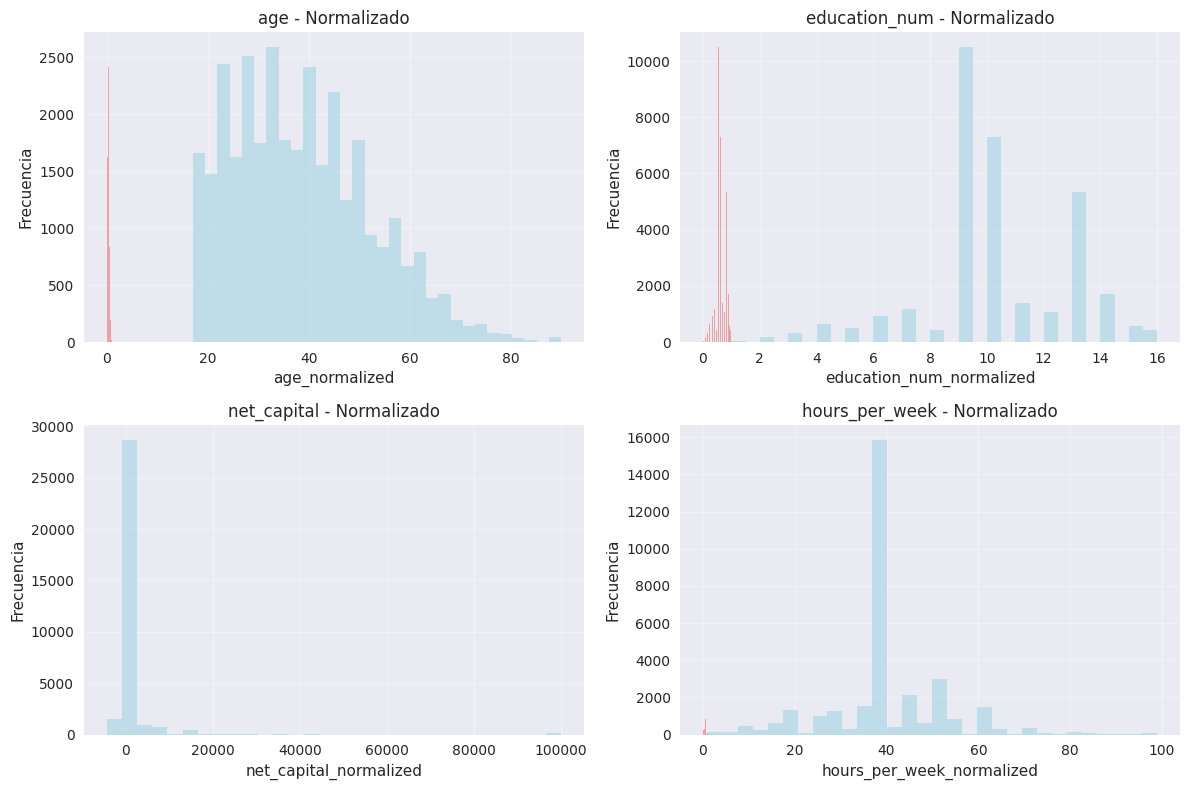

In [47]:

print("NORMALIZACIÓN DE VARIABLES NUMÉRICAS")
print("="*50)

numeric_vars = ['age', 'education_num', 'net_capital', 'hours_per_week']

def normalize_minmax(series):
    """Normaliza una serie al rango [0,1] usando min-max"""
    return (series - series.min()) / (series.max() - series.min())

for var in numeric_vars:
    print(f"\nNormalizando {var}:")
    
    min_val = df_clean[var].min()
    max_val = df_clean[var].max()
    range_val = max_val - min_val
    
    df_clean[f'{var}_normalized'] = normalize_minmax(df_clean[var])
    
    print(f"  Rango original: [{min_val:.2f}, {max_val:.2f}]")
    print(f"  Rango de valores: {range_val:.2f}")
    

    norm_min = df_clean[f'{var}_normalized'].min()
    norm_max = df_clean[f'{var}_normalized'].max()
    print(f"  Rango normalizado: [{norm_min:.4f}, {norm_max:.4f}]")
    
    print(f"  Ejemplo de normalización:")
    sample_values = df_clean[var].head(3)
    sample_normalized = df_clean[f'{var}_normalized'].head(3)
    for orig, norm in zip(sample_values, sample_normalized):
        print(f"    {orig:.2f} → {norm:.4f}")

print(f"\nVariables numéricas normalizadas: {[f'{var}_normalized' for var in numeric_vars]}")

# Visualizar normalización
num_plots = len(numeric_vars)
cols = 2 if num_plots > 1 else 1
rows = (num_plots + cols - 1) // cols
plt.figure(figsize=(6*cols, 4*rows))
for i, var in enumerate(numeric_vars):
    plt.subplot(rows, cols, i+1)
    
    plt.hist(df_clean[var], bins=30, alpha=0.7, color='lightblue', label='Original')
    plt.title(f'{var} - Original')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)
    
    plt.hist(df_clean[f'{var}_normalized'], bins=30, alpha=0.7, color='lightcoral', label='Normalizado')
    plt.title(f'{var} - Normalizado')
    plt.xlabel(f'{var}_normalized')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


PROCESAMIENTO DE VARIABLE ORDINAL: EDUCATION
Mapeo de education (ordinal):
------------------------------
  Preschool      :  1 → 0.000
  1st-4th        :  2 → 0.067
  5th-6th        :  3 → 0.133
  7th-8th        :  4 → 0.200
  9th            :  5 → 0.267
  10th           :  6 → 0.333
  11th           :  7 → 0.400
  12th           :  8 → 0.467
  HS-grad        :  9 → 0.533
  Some-college   : 10 → 0.600
  Assoc-voc      : 11 → 0.667
  Assoc-acdm     : 12 → 0.733
  Bachelors      : 13 → 0.800
  Masters        : 14 → 0.867
  Prof-school    : 15 → 0.933
  Doctorate      : 16 → 1.000

VALIDACIÓN DE ENCODING Y NORMALIZACIÓN:
----------------------------------------
Valores únicos en education: 16
Rango encoded: [1, 16]
Rango normalized: [0.0000, 1.0000]

Distribución de education_encoded:
   1. Preschool      :    51 casos → 0.000
   2. 1st-4th        :   168 casos → 0.067
   3. 5th-6th        :   333 casos → 0.133
   4. 7th-8th        :   646 casos → 0.200
   5. 9th            :   514 casos

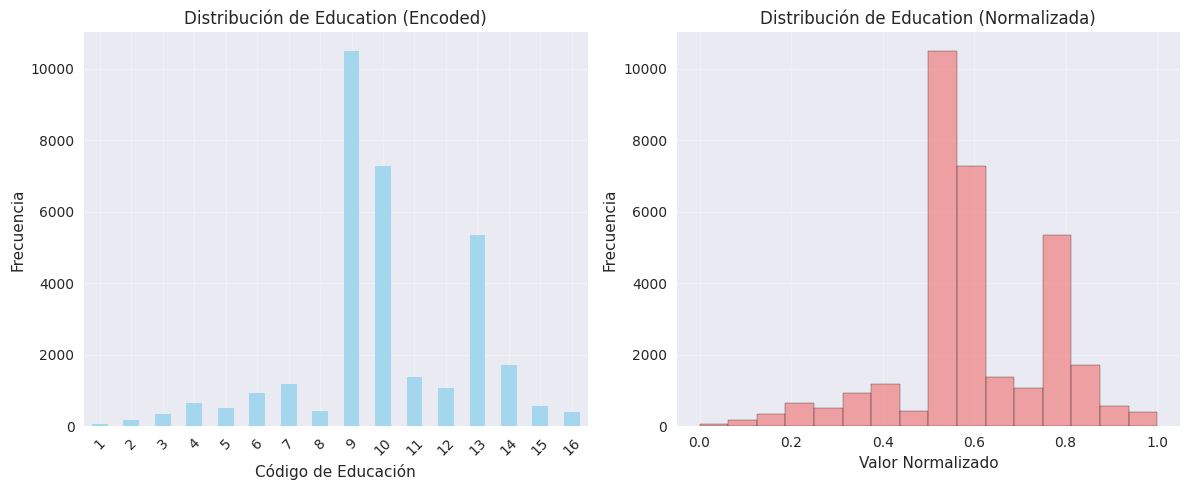

In [48]:
print("PROCESAMIENTO DE VARIABLE ORDINAL: EDUCATION")
print("="*50)

education_mapping = {
    ' Preschool': 1, ' 1st-4th': 2, ' 5th-6th': 3, ' 7th-8th': 4, ' 9th': 5,
    ' 10th': 6, ' 11th': 7, ' 12th': 8, ' HS-grad': 9, ' Some-college': 10,
    ' Assoc-voc': 11, ' Assoc-acdm': 12, ' Bachelors': 13, ' Masters': 14,
    ' Prof-school': 15, ' Doctorate': 16
}

print("Mapeo de education (ordinal):")
print("-" * 30)
for edu, code in education_mapping.items():
    normalized = (code - 1) / (16 - 1)  # Normalización a [0,1]
    print(f"  {edu.strip():15s}: {code:2d} → {normalized:.3f}")

df_clean['education_encoded'] = df_clean['education'].map(education_mapping)

df_clean['education_normalized'] = (df_clean['education_encoded'] - 1) / (16 - 1)

print(f"\nVALIDACIÓN DE ENCODING Y NORMALIZACIÓN:")
print("-" * 40)
print(f"Valores únicos en education: {df_clean['education'].nunique()}")
print(f"Rango encoded: [{df_clean['education_encoded'].min()}, {df_clean['education_encoded'].max()}]")
print(f"Rango normalized: [{df_clean['education_normalized'].min():.4f}, {df_clean['education_normalized'].max():.4f}]")

print(f"\nDistribución de education_encoded:")
education_dist = df_clean['education_encoded'].value_counts().sort_index()
for code, count in education_dist.items():
    edu_name = [k for k, v in education_mapping.items() if v == code][0].strip()
    normalized_val = (code - 1) / (16 - 1)
    print(f"  {code:2d}. {edu_name:15s}: {count:5d} casos → {normalized_val:.3f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
education_dist.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribución de Education (Encoded)')
plt.xlabel('Código de Educación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df_clean['education_normalized'], bins=16, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribución de Education (Normalizada)')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [49]:

print("VARIABLES CATEGÓRICAS NOMINALES")
print("="*50)

print("Las siguientes variables se mantienen como categóricas nominales:")
print("Gower las maneja automáticamente comparando por igualdad (0 si iguales, 1 si diferentes)")
print("-" * 70)

# Definir variables categóricas nominales (sin orden)
categorical_vars = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']

for var in categorical_vars:
    print(f"\n{var.upper()}:")
    unique_values = df_clean[var].unique()
    print(f"  Categorías ({len(unique_values)}): {list(unique_values)}")
    print(f"  Distribución:")
    value_counts = df_clean[var].value_counts()
    for value, count in value_counts.head(5).items():
        pct = (count / len(df_clean)) * 100
        print(f"    {value}: {count} ({pct:.1f}%)")
    if len(value_counts) > 5:
        print(f"    ... y {len(value_counts) - 5} categorías más")

print(f"\nVARIABLES BINARIAS")
print("="*50)

print("SEX:")
print(f"  Valores originales: {df_clean['sex'].unique()}")
df_clean['sex_binary'] = (df_clean['sex'] == ' Female').astype(int)
print(f"  Codificación: Male → 0, Female → 1")
print(f"  Distribución:")
sex_dist = df_clean['sex_binary'].value_counts().sort_index()
for val, count in sex_dist.items():
    label = 'Female' if val == 1 else 'Male'
    pct = (count / len(df_clean)) * 100
    print(f"    {val} ({label}): {count} ({pct:.1f}%)")

print(f"\nINCOME:")
print(f"  Valores originales: {df_clean['income'].unique()}")
print(f"  Ya codificada como: <=50K → 0, >50K → 1")
print(f"  Distribución:")
income_dist = df_clean['income_binary'].value_counts().sort_index()
for val, count in income_dist.items():
    label = '>50K' if val == 1 else '<=50K'
    pct = (count / len(df_clean)) * 100
    print(f"    {val} ({label}): {count} ({pct:.1f}%)")


VARIABLES CATEGÓRICAS NOMINALES
Las siguientes variables se mantienen como categóricas nominales:
Gower las maneja automáticamente comparando por igualdad (0 si iguales, 1 si diferentes)
----------------------------------------------------------------------

WORKCLASS:
  Categorías (8): [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked']
  Distribución:
     Private: 24532 (75.3%)
     Self-emp-not-inc: 2541 (7.8%)
     Local-gov: 2093 (6.4%)
     State-gov: 1298 (4.0%)
     Self-emp-inc: 1116 (3.4%)
    ... y 3 categorías más

MARITAL_STATUS:
  Categorías (7): [' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
  Distribución:
     Married-civ-spouse: 14976 (46.0%)
     Never-married: 10683 (32.8%)
     Divorced: 4443 (13.6%)
     Separated: 1025 (3.1%)
     Widowed: 993 (3.0%)
    ... y 2 categorías más

OCCUPATION:
  Categorías (14)

In [50]:

print("RESUMEN DE VARIABLES PREPARADAS PARA GOWER")
print("="*60)

gower_data = df_clean[[
    'age_normalized', 'workclass', 'education_normalized', 'marital_status',
    'occupation', 'relationship', 'race', 'sex_binary', 'net_capital_normalized',
    'hours_per_week_normalized', 'native_country', 'income_binary'
]].copy()

print(f"DataFrame preparado para Gower: {gower_data.shape[0]} filas, {gower_data.shape[1]} columnas")
print(f"Variables incluidas: {list(gower_data.columns)}")

print(f"\nVERIFICACIÓN DE TIPOS Y RANGOS:")
print("-" * 40)
for col in gower_data.columns:
    dtype = str(gower_data[col].dtype)
    if dtype in ['float64', 'int64']:
        min_val = gower_data[col].min()
        max_val = gower_data[col].max()
        print(f"{col:20s}: {dtype:10s} | [{min_val:.4f}, {max_val:.4f}]")
    else:
        n_unique = gower_data[col].nunique()
        print(f"{col:20s}: {dtype:10s} | {n_unique} categorías")

print(f"\nVERIFICACIÓN DE VALORES FALTANTES:")
print("-" * 40)
missing_count = gower_data.isnull().sum().sum()
if missing_count == 0:
    print("No hay valores faltantes en el dataset preparado")
else:
    print(f"Se encontraron {missing_count} valores faltantes")
    print("Valores faltantes por columna:")
    for col in gower_data.columns:
        missing = gower_data[col].isnull().sum()
        if missing > 0:
            print(f"  {col}: {missing}")

print(f"\nPRIMERAS 5 FILAS DEL DATASET PREPARADO:")
print("-" * 50)
print(gower_data.head())


RESUMEN DE VARIABLES PREPARADAS PARA GOWER
DataFrame preparado para Gower: 32561 filas, 12 columnas
Variables incluidas: ['age_normalized', 'workclass', 'education_normalized', 'marital_status', 'occupation', 'relationship', 'race', 'sex_binary', 'net_capital_normalized', 'hours_per_week_normalized', 'native_country', 'income_binary']

VERIFICACIÓN DE TIPOS Y RANGOS:
----------------------------------------
age_normalized      : float64    | [0.0000, 1.0000]
workclass           : object     | 8 categorías
education_normalized: float64    | [0.0000, 1.0000]
marital_status      : object     | 7 categorías
occupation          : object     | 14 categorías
relationship        : object     | 6 categorías
race                : object     | 5 categorías
sex_binary          : int64      | [0.0000, 1.0000]
net_capital_normalized: float64    | [0.0000, 1.0000]
hours_per_week_normalized: float64    | [0.0000, 1.0000]
native_country      : object     | 41 categorías
income_binary       : int64     

In [51]:

print("VALIDACIÓN CON SUBCONJUNTO PEQUEÑO")
print("="*50)

sample_indices = [4916, 11731, 25496, 453, 14529, 23897]

print(f"Usando los mismos registros que en scriptBorrador2.ipynb:")
print(f"Índices: {sample_indices}")


valid_indices = [idx for idx in sample_indices if idx in df_clean.index]
if len(valid_indices) != len(sample_indices):
    print(f"Advertencia: Algunos índices no existen en el dataset")
    print(f"Índices válidos: {valid_indices}")
    sample_indices = valid_indices


validation_data = gower_data.loc[sample_indices].copy()

print(f"\nDATOS DEL SUBCONJUNTO DE VALIDACIÓN:")
print("-" * 50)
print(validation_data)

print(f"\nDATOS DE LAS 6 FILAS:")
print("-" * 50)
display_cols = ['age', 'workclass', 'education', 'marital_status', 'occupation', 'sex', 'income']
display_data = df_clean.loc[sample_indices, display_cols].copy()
print(display_data.to_string(index=True))

print(f"\nINFORMACIÓN DETALLADA DE CADA CASO:")
print("-" * 50)
for i, idx in enumerate(sample_indices):
    row = df_clean.loc[idx]
    print(f"Caso {i+1} (índice {idx}):")
    print(f"  Edad: {row['age']}, Sexo: {row['sex'].strip()}, Raza: {row['race'].strip()}")
    print(f"  Ocupación: {row['occupation'].strip()}, Ingresos: {row['income'].strip()}")
    print(f"  Educación: {row['education'].strip()}, Ahorro neto: ${row['net_capital']}")
    print()


VALIDACIÓN CON SUBCONJUNTO PEQUEÑO
Usando los mismos registros que en scriptBorrador2.ipynb:
Índices: [4916, 11731, 25496, 453, 14529, 23897]

DATOS DEL SUBCONJUNTO DE VALIDACIÓN:
--------------------------------------------------
       age_normalized      workclass  education_normalized  \
4916         0.410959        Private              0.666667   
11731        1.000000        Private              0.533333   
25496        0.684932      State-gov              0.600000   
453          0.342466        Private              0.733333   
14529        0.547945   Self-emp-inc              0.800000   
23897        0.452055      Local-gov              0.600000   

            marital_status        occupation    relationship    race  \
4916    Married-civ-spouse     Other-service         Husband   White   
11731              Widowed    Prof-specialty   Not-in-family   White   
25496   Married-civ-spouse   Farming-fishing         Husband   White   
453     Married-civ-spouse   Exec-managerial  

In [52]:

print("CÁLCULO DE MATRIZ DE DISTANCIAS CON GOWER")
print("="*50)

start_time = time.time()


distance_matrix = gower.gower_matrix(validation_data)

end_time = time.time()
execution_time = end_time - start_time

print(f"Matriz de distancias calculada en {execution_time:.4f} segundos")
print(f"Dimensiones de la matriz: {distance_matrix.shape}")


print(f"\nVALIDACIÓN DE PROPIEDADES DE LA MATRIZ:")
print("-" * 40)


is_symmetric = np.allclose(distance_matrix, distance_matrix.T, rtol=1e-10)
print(f"1. Matriz simétrica: {'✅' if is_symmetric else '❌'}")


diagonal_zeros = np.allclose(np.diag(distance_matrix), 0, rtol=1e-10)
print(f"2. Diagonal = 0: {'✅' if diagonal_zeros else '❌'}")

min_val = np.min(distance_matrix)
max_val = np.max(distance_matrix)
in_range = min_val >= 0 and max_val <= 1
print(f"3. Valores en [0,1]: {'✅' if in_range else '❌'} (min: {min_val:.4f}, max: {max_val:.4f})")

no_negatives = min_val >= 0
print(f"4. Sin valores negativos: {'✅' if no_negatives else '❌'}")

# Mostrar la matriz
print(f"\nMATRIZ DE DISTANCIAS (6x6) - LIBRERÍA GOWER:")
print("-" * 50)
print("     ", end="")
for i in range(6):
    print(f"Caso{i+1:2d}", end="  ")
print()
for i in range(6):
    print(f"Caso{i+1:2d} ", end="")
    for j in range(6):
        print(f"{distance_matrix[i,j]:.3f} ", end="")
    print()


print(f"\nANÁLISIS DE SIMILITUD:")
print("-" * 30)

upper_tri_indices = np.triu_indices_from(distance_matrix, k=1)
distances_upper = distance_matrix[upper_tri_indices]

min_distance_idx = np.argmin(distances_upper)
max_distance_idx = np.argmax(distances_upper)

min_i, min_j = upper_tri_indices[0][min_distance_idx], upper_tri_indices[1][min_distance_idx]
max_i, max_j = upper_tri_indices[0][max_distance_idx], upper_tri_indices[1][max_distance_idx]

print(f"Par más similar: Caso{min_i+1} - Caso{min_j+1} (distancia: {distance_matrix[min_i, min_j]:.4f})")
print(f"Par más diferente: Caso{max_i+1} - Caso{max_j+1} (distancia: {distance_matrix[max_i, max_j]:.4f})")

print(f"\nCARACTERÍSTICAS DE LOS PARES EXTREMOS:")
print("-" * 40)

print(f"Par más similar (Caso{min_i+1} - Caso{min_j+1}):")
for case_idx in [min_i, min_j]:
    idx = sample_indices[case_idx]
    row = df_clean.loc[idx]
    print(f"  Caso{case_idx+1}: {row['sex'].strip()}, {row['race'].strip()}, {row['occupation'].strip()}, {row['income'].strip()}")

print(f"\nPar más diferente (Caso{max_i+1} - Caso{max_j+1}):")
for case_idx in [max_i, max_j]:
    idx = sample_indices[case_idx]
    row = df_clean.loc[idx]
    print(f"  Caso{case_idx+1}: {row['sex'].strip()}, {row['race'].strip()}, {row['occupation'].strip()}, {row['income'].strip()}")



CÁLCULO DE MATRIZ DE DISTANCIAS CON GOWER
Matriz de distancias calculada en 0.0015 segundos
Dimensiones de la matriz: (6, 6)

VALIDACIÓN DE PROPIEDADES DE LA MATRIZ:
----------------------------------------
1. Matriz simétrica: ✅
2. Diagonal = 0: ✅
3. Valores en [0,1]: ✅ (min: 0.0000, max: 0.6591)
4. Sin valores negativos: ✅

MATRIZ DE DISTANCIAS (6x6) - LIBRERÍA GOWER:
--------------------------------------------------
     Caso 1  Caso 2  Caso 3  Caso 4  Caso 5  Caso 6  
Caso 1 0.000 0.444 0.287 0.280 0.319 0.359 
Caso 2 0.444 0.000 0.407 0.640 0.562 0.659 
Caso 3 0.287 0.407 0.000 0.483 0.405 0.428 
Caso 4 0.280 0.640 0.483 0.000 0.307 0.389 
Caso 5 0.319 0.562 0.405 0.307 0.000 0.335 
Caso 6 0.359 0.659 0.428 0.389 0.335 0.000 

ANÁLISIS DE SIMILITUD:
------------------------------
Par más similar: Caso1 - Caso4 (distancia: 0.2795)
Par más diferente: Caso2 - Caso6 (distancia: 0.6591)

CARACTERÍSTICAS DE LOS PARES EXTREMOS:
----------------------------------------
Par más similar (C

VISUALIZACIÓN DE LA MATRIZ DE DISTANCIAS


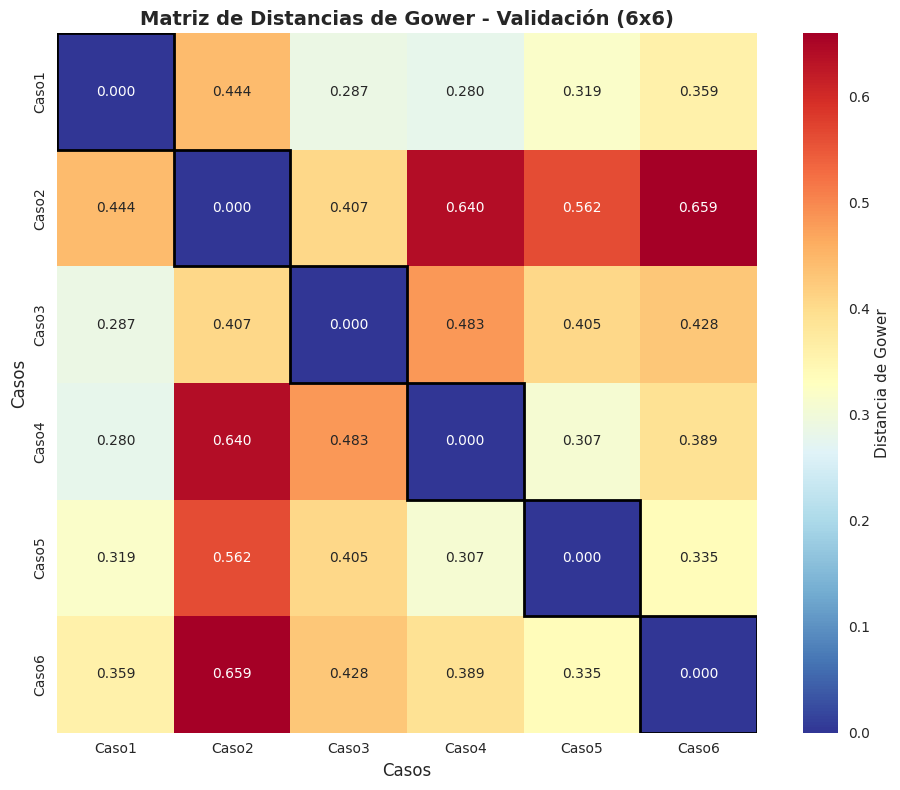

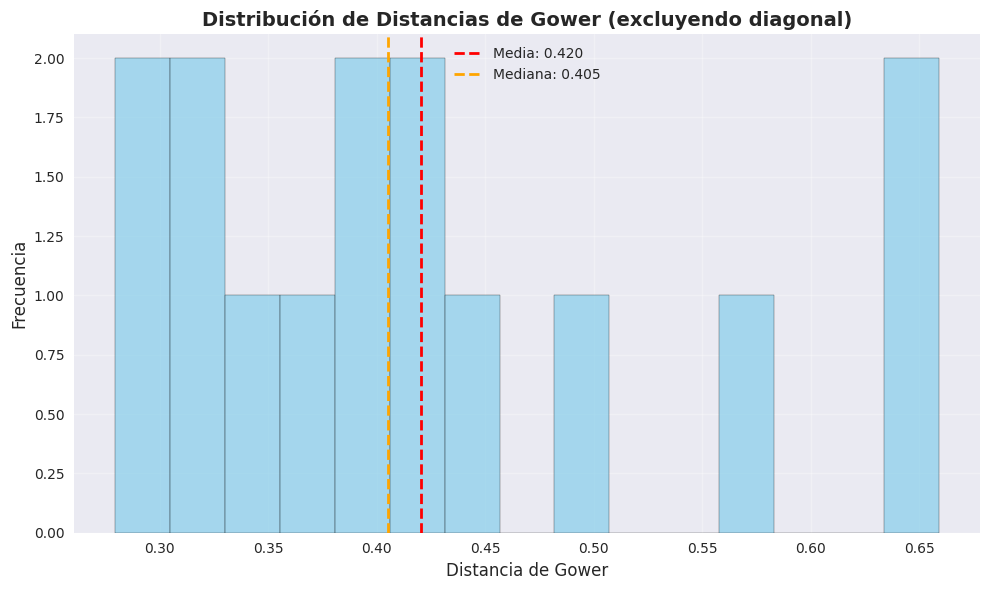

ESTADÍSTICAS DE LA DISTRIBUCIÓN DE DISTANCIAS:
--------------------------------------------------
Media: 0.4202
Mediana: 0.4051
Desviación estándar: 0.1163
Mínimo: 0.2795
Máximo: 0.6591
Q1 (25%): 0.3270
Q3 (75%): 0.4636


In [53]:

print("VISUALIZACIÓN DE LA MATRIZ DE DISTANCIAS")
print("="*50)


plt.figure(figsize=(10, 8))

sns.heatmap(distance_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='RdYlBu_r', 
            square=True,
            xticklabels=[f'Caso{i+1}' for i in range(6)],
            yticklabels=[f'Caso{i+1}' for i in range(6)],
            cbar_kws={'label': 'Distancia de Gower'})

plt.title('Matriz de Distancias de Gower - Validación (6x6)', fontsize=14, fontweight='bold')
plt.xlabel('Casos', fontsize=12)
plt.ylabel('Casos', fontsize=12)


for i in range(6):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='black', lw=2))

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

distances_no_diag = distance_matrix[np.triu_indices_from(distance_matrix, k=1)]

plt.hist(distances_no_diag, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(distances_no_diag), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(distances_no_diag):.3f}')
plt.axvline(np.median(distances_no_diag), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {np.median(distances_no_diag):.3f}')

plt.title('Distribución de Distancias de Gower (excluyendo diagonal)', fontsize=14, fontweight='bold')
plt.xlabel('Distancia de Gower', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print(f"ESTADÍSTICAS DE LA DISTRIBUCIÓN DE DISTANCIAS:")
print("-" * 50)
print(f"Media: {np.mean(distances_no_diag):.4f}")
print(f"Mediana: {np.median(distances_no_diag):.4f}")
print(f"Desviación estándar: {np.std(distances_no_diag):.4f}")
print(f"Mínimo: {np.min(distances_no_diag):.4f}")
print(f"Máximo: {np.max(distances_no_diag):.4f}")
print(f"Q1 (25%): {np.percentile(distances_no_diag, 25):.4f}")
print(f"Q3 (75%): {np.percentile(distances_no_diag, 75):.4f}")


In [ ]:

print("CÁLCULO DE MATRIZ EN MUESTRA PEQUEÑA (200 FILAS)")
print("="*60)

sample_size = 200
print(f"Seleccionando muestra aleatoria de {sample_size} filas...")

sample_200 = gower_data.sample(n=sample_size, random_state=42)
sample_indices_200 = sample_200.index.tolist()

print(f"Muestra seleccionada: {sample_200.shape[0]} filas, {sample_200.shape[1]} columnas")
print(f"Índices de la muestra: {sample_indices_200[:10]}... (mostrando primeros 10)")


print(f"\nCalculando matriz de distancias...")
start_time = time.time()

distance_matrix_200 = gower.gower_matrix(sample_200)

end_time = time.time()
execution_time = end_time - start_time

print(f"Matriz calculada en {execution_time:.4f} segundos")
print(f"Dimensiones: {distance_matrix_200.shape}")

# Validar propiedades
print(f"\nVALIDACIÓN DE PROPIEDADES:")
print("-" * 30)

# Verificar simetría
is_symmetric = np.allclose(distance_matrix_200, distance_matrix_200.T, rtol=1e-10)
print(f"Matriz simétrica: {'✅' if is_symmetric else '❌'}")

# Verificar diagonal
diagonal_zeros = np.allclose(np.diag(distance_matrix_200), 0, rtol=1e-10)
print(f"Diagonal = 0: {'✅' if diagonal_zeros else '❌'}")

# Verificar rango [0,1]
min_val = np.min(distance_matrix_200)
max_val = np.max(distance_matrix_200)
in_range = min_val >= 0 and max_val <= 1
print(f"Valores en [0,1]: {'✅' if in_range else '❌'} (min: {min_val:.4f}, max: {max_val:.4f})")


print(f"\nESTADÍSTICAS DE LA MATRIZ:")
print("-" * 30)

upper_tri_indices = np.triu_indices_from(distance_matrix_200, k=1)
distances_200 = distance_matrix_200[upper_tri_indices]

print(f"Total de distancias calculadas: {len(distances_200)}")
print(f"Media: {np.mean(distances_200):.4f}")
print(f"Mediana: {np.median(distances_200):.4f}")
print(f"Desviación estándar: {np.std(distances_200):.4f}")
print(f"Mínimo: {np.min(distances_200):.4f}")
print(f"Máximo: {np.max(distances_200):.4f}")

np.save('distance_matrix_200.npy', distance_matrix_200)


CÁLCULO DE MATRIZ EN MUESTRA PEQUEÑA (200 FILAS)
Seleccionando muestra aleatoria de 200 filas...
Muestra seleccionada: 200 filas, 12 columnas
Índices de la muestra: [14160, 27048, 28868, 5667, 7827, 15382, 4641, 8943, 216, 5121]... (mostrando primeros 10)

Calculando matriz de distancias...
Matriz calculada en 0.0441 segundos
Dimensiones: (200, 200)

VALIDACIÓN DE PROPIEDADES:
------------------------------
Matriz simétrica: ✅
Diagonal = 0: ✅
Valores en [0,1]: ✅ (min: 0.0000, max: 0.7987)

ESTADÍSTICAS DE LA MATRIZ:
------------------------------
Total de distancias calculadas: 19900
Media: 0.3817
Mediana: 0.3827
Desviación estándar: 0.1253
Mínimo: 0.0011
Máximo: 0.7987

Matriz guardada como 'distance_matrix_200.npy'


ANÁLISIS DE LA MATRIZ DE DISTANCIAS (200x200)


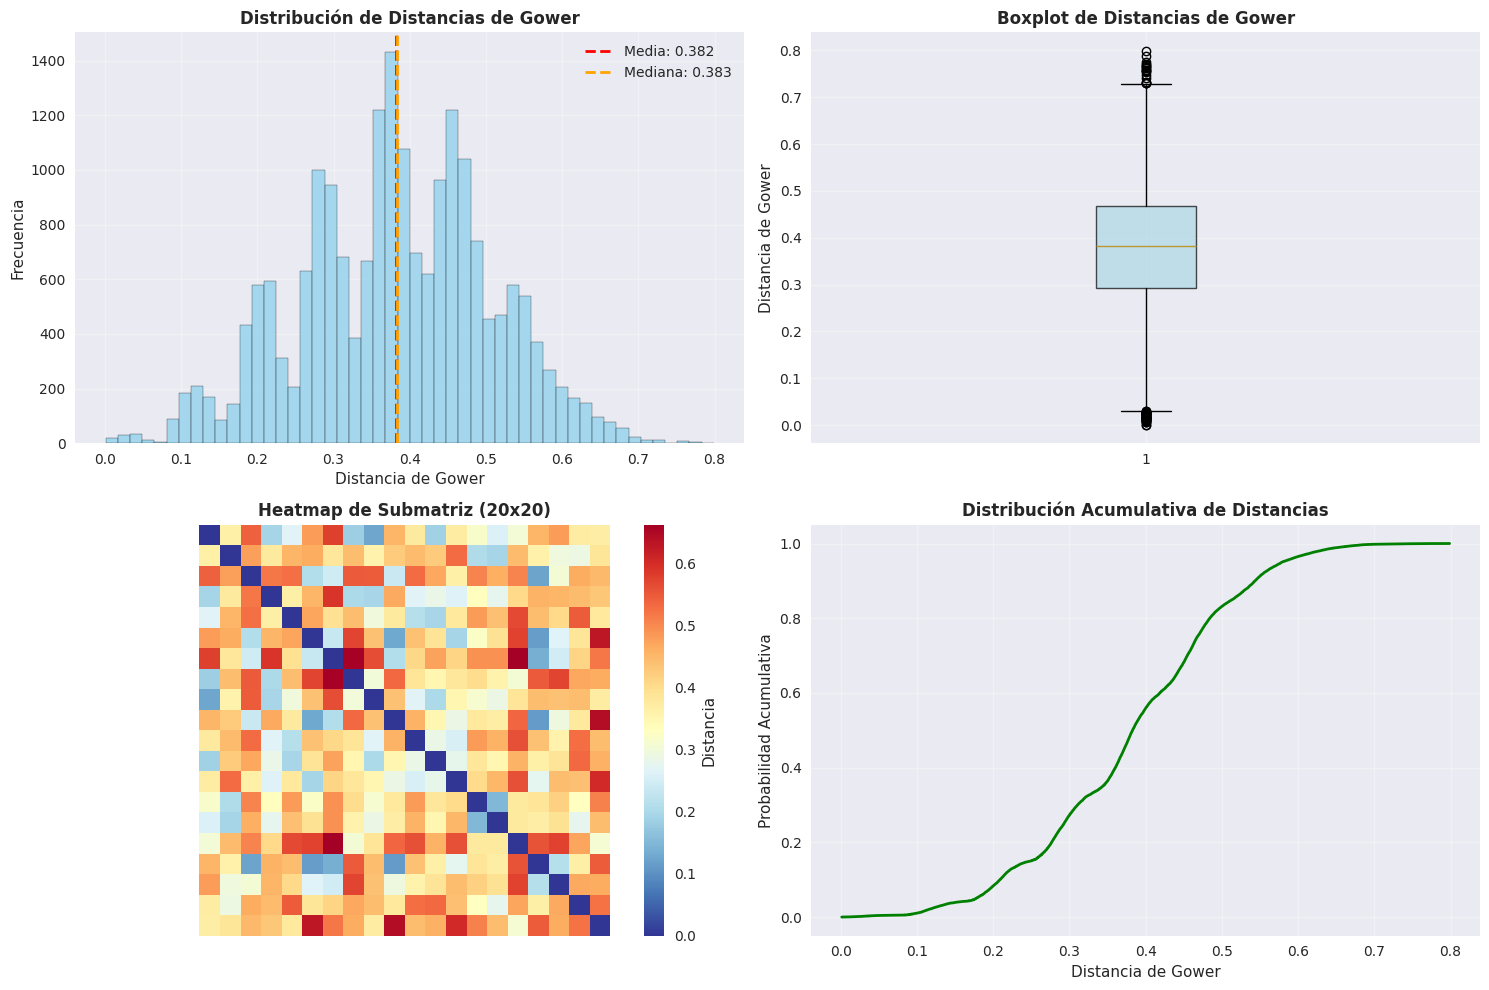


ANÁLISIS DE CASOS EXTREMOS:
----------------------------------------
Par más similar: Caso50 - Caso149 (distancia: 0.0011)
Par más diferente: Caso111 - Caso132 (distancia: 0.7987)

CARACTERÍSTICAS DE LOS CASOS EXTREMOS:
--------------------------------------------------
Par más similar:
  Caso50 (índice 30649): Male, White, Craft-repair, >50K
  Caso149 (índice 3929): Male, White, Craft-repair, >50K

Par más diferente:
  Caso111 (índice 26268): Female, White, Prof-specialty, >50K
  Caso132 (índice 14159): Male, Asian-Pac-Islander, Adm-clerical, <=50K


In [55]:

print("ANÁLISIS DE LA MATRIZ DE DISTANCIAS (200x200)")
print("="*60)


plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.hist(distances_200, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(distances_200), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(distances_200):.3f}')
plt.axvline(np.median(distances_200), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {np.median(distances_200):.3f}')
plt.title('Distribución de Distancias de Gower', fontweight='bold')
plt.xlabel('Distancia de Gower')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.boxplot(distances_200, patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.title('Boxplot de Distancias de Gower', fontweight='bold')
plt.ylabel('Distancia de Gower')
plt.grid(True, alpha=0.3)


plt.subplot(2, 2, 3)
submatrix_size = 20
submatrix = distance_matrix_200[:submatrix_size, :submatrix_size]
sns.heatmap(submatrix, 
            cmap='RdYlBu_r', 
            square=True,
            xticklabels=False,
            yticklabels=False,
            cbar_kws={'label': 'Distancia'})
plt.title(f'Heatmap de Submatriz ({submatrix_size}x{submatrix_size})', fontweight='bold')


plt.subplot(2, 2, 4)
sorted_distances = np.sort(distances_200)
cumulative_prob = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances)
plt.plot(sorted_distances, cumulative_prob, linewidth=2, color='green')
plt.title('Distribución Acumulativa de Distancias', fontweight='bold')
plt.xlabel('Distancia de Gower')
plt.ylabel('Probabilidad Acumulativa')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print(f"\nANÁLISIS DE CASOS EXTREMOS:")
print("-" * 40)


min_distance_idx = np.argmin(distances_200)
max_distance_idx = np.argmax(distances_200)

min_i, min_j = upper_tri_indices[0][min_distance_idx], upper_tri_indices[1][min_distance_idx]
max_i, max_j = upper_tri_indices[0][max_distance_idx], upper_tri_indices[1][max_distance_idx]

print(f"Par más similar: Caso{min_i+1} - Caso{min_j+1} (distancia: {distance_matrix_200[min_i, min_j]:.4f})")
print(f"Par más diferente: Caso{max_i+1} - Caso{max_j+1} (distancia: {distance_matrix_200[max_i, max_j]:.4f})")


print(f"\nCARACTERÍSTICAS DE LOS CASOS EXTREMOS:")
print("-" * 50)

idx_min_i = sample_indices_200[min_i]
idx_min_j = sample_indices_200[min_j]
row_min_i = df_clean.loc[idx_min_i]
row_min_j = df_clean.loc[idx_min_j]

print(f"Par más similar:")
print(f"  Caso{min_i+1} (índice {idx_min_i}): {row_min_i['sex'].strip()}, {row_min_i['race'].strip()}, {row_min_i['occupation'].strip()}, {row_min_i['income'].strip()}")
print(f"  Caso{min_j+1} (índice {idx_min_j}): {row_min_j['sex'].strip()}, {row_min_j['race'].strip()}, {row_min_j['occupation'].strip()}, {row_min_j['income'].strip()}")

idx_max_i = sample_indices_200[max_i]
idx_max_j = sample_indices_200[max_j]
row_max_i = df_clean.loc[idx_max_i]
row_max_j = df_clean.loc[idx_max_j]

print(f"\nPar más diferente:")
print(f"  Caso{max_i+1} (índice {idx_max_i}): {row_max_i['sex'].strip()}, {row_max_i['race'].strip()}, {row_max_i['occupation'].strip()}, {row_max_i['income'].strip()}")
print(f"  Caso{max_j+1} (índice {idx_max_j}): {row_max_j['sex'].strip()}, {row_max_j['race'].strip()}, {row_max_j['occupation'].strip()}, {row_max_j['income'].strip()}")


ANÁLISIS EXPLORATORIO DE PATRONES POR GRUPOS

GÉNERO:
------------------------------
   Female: 2701 pares, distancia promedio: 0.3197
   Male: 7875 pares, distancia promedio: 0.3341
   Female vs  Male: 9324 pares, distancia promedio: 0.4398

RAZA (TOP 3):
------------------------------
   Black: 105 pares, distancia promedio: 0.3598
   Other: 6 pares, distancia promedio: 0.4757
   White: 15225 pares, distancia promedio: 0.3602
   Black vs  Other: 60 pares, distancia promedio: 0.4954
   Black vs  White: 2625 pares, distancia promedio: 0.4520
   Other vs  White: 700 pares, distancia promedio: 0.4881

INGRESOS:
------------------------------
  0: 9870 pares, distancia promedio: 0.3452
  1: 1711 pares, distancia promedio: 0.2750
  0 vs 1: 8319 pares, distancia promedio: 0.4469

OCUPACIÓN (TOP 5):
------------------------------
   Adm-clerical: 435 pares, distancia promedio: 0.3179
   Craft-repair: 300 pares, distancia promedio: 0.2470
   Exec-managerial: 465 pares, distancia promedio: 0.3

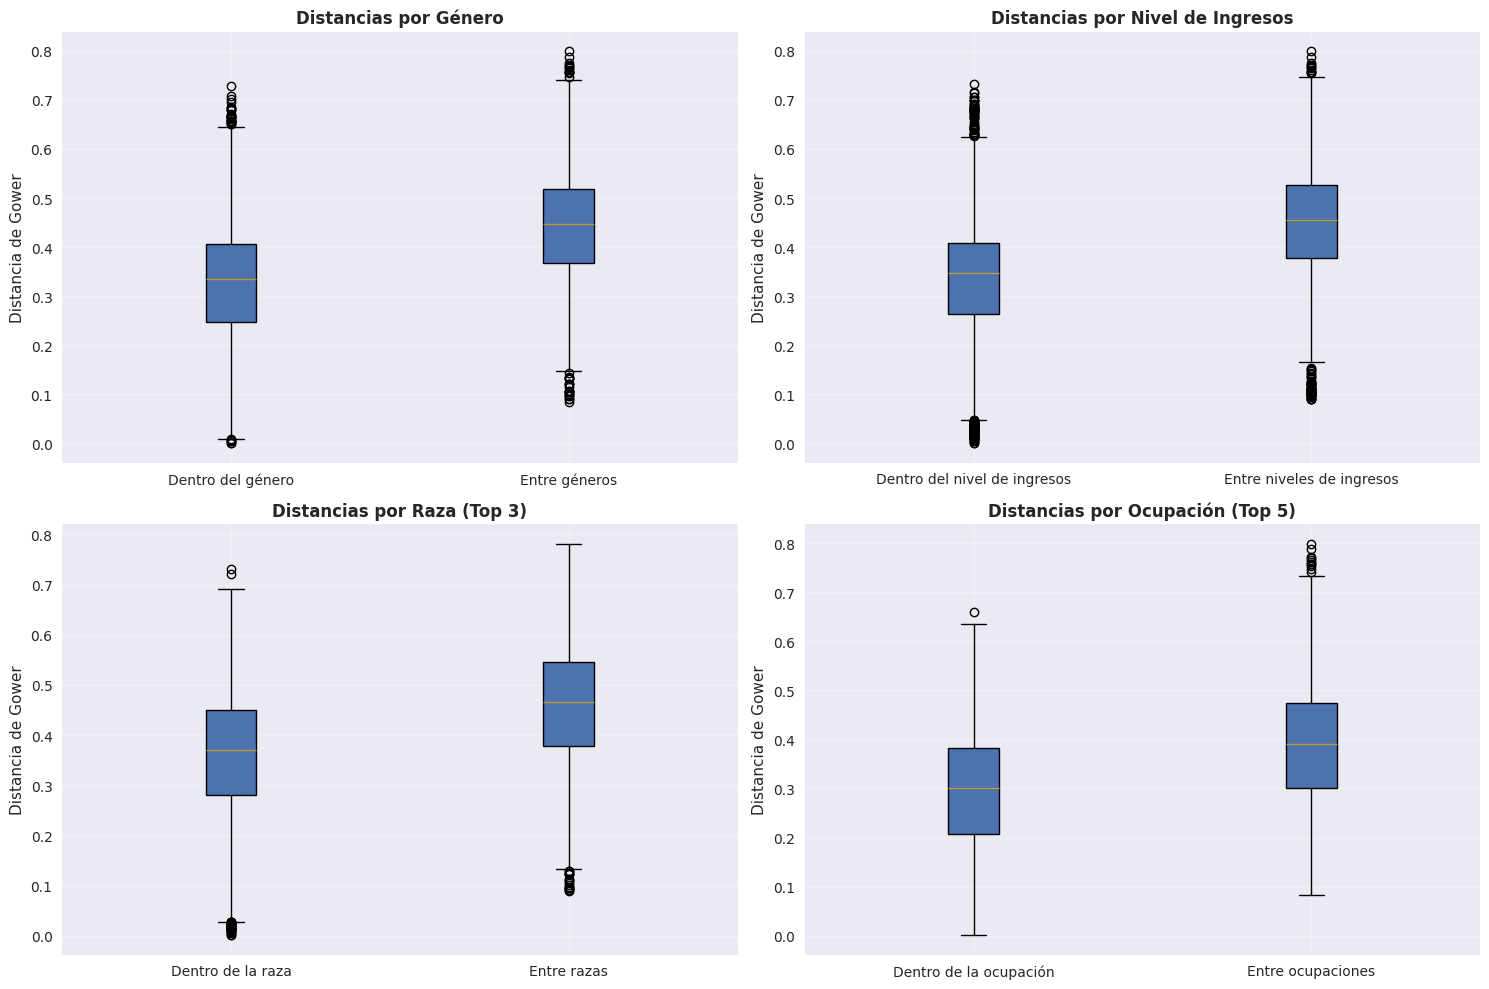

In [56]:

print("ANÁLISIS EXPLORATORIO DE PATRONES POR GRUPOS")
print("="*60)


sample_200_info = df_clean.loc[sample_indices_200].copy()


def calculate_group_distances(distance_matrix, group_labels, group_name):
    unique_groups = np.unique(group_labels)
    n_groups = len(unique_groups)
    
    print(f"\n{group_name.upper()}:")
    print("-" * 30)
    
    within_distances = []
    for group in unique_groups:
        group_indices = np.where(group_labels == group)[0]
        if len(group_indices) > 1:
            group_distances = []
            for i in range(len(group_indices)):
                for j in range(i+1, len(group_indices)):
                    idx_i, idx_j = group_indices[i], group_indices[j]
                    group_distances.append(distance_matrix[idx_i, idx_j])
            
            if group_distances:
                within_distances.extend(group_distances)
                print(f"  {group}: {len(group_distances)} pares, distancia promedio: {np.mean(group_distances):.4f}")
    
    between_distances = []
    for i in range(n_groups):
        for j in range(i+1, n_groups):
            group1_indices = np.where(group_labels == unique_groups[i])[0]
            group2_indices = np.where(group_labels == unique_groups[j])[0]
            
            between_group_distances = []
            for idx1 in group1_indices:
                for idx2 in group2_indices:
                    between_group_distances.append(distance_matrix[idx1, idx2])
            
            if between_group_distances:
                between_distances.extend(between_group_distances)
                print(f"  {unique_groups[i]} vs {unique_groups[j]}: {len(between_group_distances)} pares, distancia promedio: {np.mean(between_group_distances):.4f}")
    
    return within_distances, between_distances

sex_labels = sample_200_info['sex'].values
within_sex, between_sex = calculate_group_distances(distance_matrix_200, sex_labels, "Género")

race_counts = sample_200_info['race'].value_counts()
top_races = race_counts.head(3).index.tolist()
race_mask = sample_200_info['race'].isin(top_races)
race_sample = sample_200_info[race_mask]
race_indices = race_sample.index.tolist()

race_sample_data = gower_data.loc[race_indices]
race_distance_matrix = gower.gower_matrix(race_sample_data)
race_labels = race_sample['race'].values

within_race, between_race = calculate_group_distances(race_distance_matrix, race_labels, "Raza (Top 3)")

income_labels = sample_200_info['income_binary'].values
within_income, between_income = calculate_group_distances(distance_matrix_200, income_labels, "Ingresos")

occupation_counts = sample_200_info['occupation'].value_counts()
top_occupations = occupation_counts.head(5).index.tolist()
occupation_mask = sample_200_info['occupation'].isin(top_occupations)
occupation_sample = sample_200_info[occupation_mask]
occupation_indices = occupation_sample.index.tolist()

occupation_sample_data = gower_data.loc[occupation_indices]
occupation_distance_matrix = gower.gower_matrix(occupation_sample_data)
occupation_labels = occupation_sample['occupation'].values

within_occupation, between_occupation = calculate_group_distances(occupation_distance_matrix, occupation_labels, "Ocupación (Top 5)")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
data_to_plot = [within_sex, between_sex]
labels = ['Dentro del género', 'Entre géneros']
plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
plt.title('Distancias por Género', fontweight='bold')
plt.ylabel('Distancia de Gower')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
data_to_plot = [within_income, between_income]
labels = ['Dentro del nivel de ingresos', 'Entre niveles de ingresos']
plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
plt.title('Distancias por Nivel de Ingresos', fontweight='bold')
plt.ylabel('Distancia de Gower')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
data_to_plot = [within_race, between_race]
labels = ['Dentro de la raza', 'Entre razas']
plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
plt.title('Distancias por Raza (Top 3)', fontweight='bold')
plt.ylabel('Distancia de Gower')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
data_to_plot = [within_occupation, between_occupation]
labels = ['Dentro de la ocupación', 'Entre ocupaciones']
plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
plt.title('Distancias por Ocupación (Top 5)', fontweight='bold')
plt.ylabel('Distancia de Gower')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()